In [1]:
import pandas as pd 
import plotly.express as px 
import numpy as np
import seaborn as sns
import math
import pylab 
import scipy.stats as stats 
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score
import warnings
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

warnings.filterwarnings('ignore') # disable warnings

In [2]:
df = pd.read_csv("report_2018-2019.csv")
df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB
None


In [3]:
print(df["Country or region"].nunique())
print(df["Country or region"].to_string())

160
0                   Afghanistan
1                   Afghanistan
2                       Albania
3                       Albania
4                       Algeria
5                       Algeria
6                        Angola
7                     Argentina
8                     Argentina
9                       Armenia
10                      Armenia
11                    Australia
12                    Australia
13                      Austria
14                      Austria
15                   Azerbaijan
16                   Azerbaijan
17                      Bahrain
18                      Bahrain
19                   Bangladesh
20                   Bangladesh
21                      Belarus
22                      Belarus
23                      Belgium
24                      Belgium
25                       Belize
26                        Benin
27                        Benin
28                       Bhutan
29                       Bhutan
30                      Bolivia
31  

In [4]:

country_latitudes = {
    "Afghanistan": 33.93911,
    "Albania": 41.1533,
    "Algeria": 28.0339,
    "Angola": -11.2027,
    "Argentina": -38.4161,
    "Armenia": 40.0691,
    "Australia": -25.2744,
    "Austria": 47.5162,
    "Azerbaijan": 40.1431,
    "Bahrain": 26.0667,
    "Bangladesh": 23.685,
    "Belarus": 53.7098,
    "Belgium": 50.5039,
    "Belize": 17.1899,
    "Benin": 9.3077,
    "Bhutan": 27.5142,
    "Bolivia": -16.2902,
    "Bosnia and Herzegovina": 43.9159,
    "Botswana": -22.3285,
    "Brazil": -14.235,
    "Bulgaria": 42.7339,
    "Burkina Faso": 12.2383,
    "Burundi": -3.3731,
    "Cambodia": 12.5657,
    "Cameroon": 7.3697,
    "Canada": 56.1304,
    "Central African Republic": 6.6111,
    "Chad": 15.4542,
    "Chile": -35.6751,
    "China": 35.8617,
    "Colombia": 4.5709,
    "Comoros": -11.6455,
    "Congo (Brazzaville)": -4.2634,
    "Congo (Kinshasa)": -4.0383,
    "Costa Rica": 9.7489,
    "Croatia": 45.1,
    "Cyprus": 35.1264,
    "Czech Republic": 49.8175,
    "Denmark": 56.2639,
    "Dominican Republic": 18.7357,
    "Ecuador": -1.8312,
    "Egypt": 26.8206,
    "El Salvador": 13.7942,
    "Estonia": 58.5953,
    "Ethiopia": 9.145,
    "Finland": 61.9241,
    "France": 46.6034,
    "Gabon": -0.8037,
    "Gambia": 13.4432,
    "Georgia": 42.3154,
    "Germany": 51.1657,
    "Ghana": 7.9465,
    "Greece": 39.0742,
    "Guatemala": 15.7835,
    "Guinea": 9.9456,
    "Haiti": 18.9712,
    "Honduras": 15.2,
    "Hong Kong": 22.3193,
    "Hungary": 47.1625,
    "Iceland": 64.9631,
    "India": 20.5937,
    "Indonesia": -0.7893,
    "Iran": 32.4279,
    "Iraq": 33.2232,
    "Ireland": 53.1424,
    "Israel": 31.0461,
    "Italy": 41.8719,
    "Ivory Coast": 7.54,
    "Jamaica": 18.1096,
    "Japan": 36.2048,
    "Jordan": 30.5852,
    "Kazakhstan": 48.0196,
    "Kenya": -0.0236,
    "Kosovo": 42.6026,
    "Kuwait": 29.3759,
    "Kyrgyzstan": 41.2044,
    "Laos": 19.8563,
    "Latvia": 56.8796,
    "Lebanon": 33.8547,
    "Lesotho": -29.61,
    "Liberia": 6.4281,
    "Libya": 26.3351,
    "Lithuania": 55.1694,
    "Luxembourg": 49.8153,
    "Macedonia": 41.6086,
    "Madagascar": -18.7669,
    "Malawi": -13.2543,
    "Malaysia": 4.2105,
    "Mali": 17.5707,
    "Malta": 35.9375,
    "Mauritania": 21.0079,
    "Mauritius": -20.3484,
    "Mexico": 23.6345,
    "Moldova": 47.4116,
    "Mongolia": 46.8625,
    "Montenegro": 42.7087,
    "Morocco": 31.7917,
    "Mozambique": -18.6657,
    "Myanmar": 21.9162,
    "Namibia": -22.9576,
    "Nepal": 28.3949,
    "Netherlands": 52.1326,
    "New Zealand": -40.9006,
    "Nicaragua": 12.8654,
    "Niger": 17.6078,
    "Nigeria": 9.082,
    "North Macedonia": 41.6086,
    "Northern Cyprus": 35.1264,
    "Norway": 60.472,
    "Pakistan": 30.3753,
    "Palestinian Territories": 31.9522,
    "Panama": 8.5379,
    "Paraguay": -23.4425,
    "Peru": -9.19,
    "Philippines": 12.8797,
    "Poland": 51.9194,
    "Portugal": 39.3999,
    "Qatar": 25.3548,
    "Romania": 45.9432,
    "Russia": 61.524,
    "Rwanda": -1.9403,
    "Saudi Arabia": 23.8859,
    "Senegal": 14.4974,
    "Serbia": 44.0165,
    "Sierra Leone": 8.4606,
    "Singapore": 1.3521,
    "Slovakia": 48.669,
    "Slovenia": 46.1512,
    "Somalia": 5.1521,
    "South Africa": -30.5595,
    "South Korea": 35.9078,
    "South Sudan": 6.8769,
    "Spain": 40.4637,
    "Sri Lanka": 7.8731,
    "Sudan": 12.8628,
    "Swaziland": -26.5225,
    "Sweden": 60.1282,
    "Switzerland": 46.8182,
    "Syria": 34.8021,
    "Taiwan": 23.6978,
    "Tajikistan": 38.861,
    "Tanzania": -6.369,
    "Thailand": 15.87,
    "Togo": 8.6195,
    "Trinidad & Tobago": 10.6918,
    "Tunisia": 33.8869,
    "Turkey": 38.9637,
    "Turkmenistan": 38.9697,
    "Uganda": 1.3733,
    "Ukraine": 48.3794,
    "United Arab Emirates": 23.4241,
    "United Kingdom": 55.3781,
    "United States": 37.0902,
    "Uruguay": -32.5228,
    "Uzbekistan": 41.3775,
    "Venezuela": 6.4238,
    "Vietnam": 14.0583,
    "Yemen": 15.5527,
    "Zambia": -13.1339,
    "Zimbabwe": -19.0154
}

import pandas as pd
df['Latitude'] = df['Country or region'].map(country_latitudes)  # map here take each row and apply the methd on it   # 1

print(df.head())

   Overall rank Country or region  Year  Score  GDP per capita  \
0           154       Afghanistan  2019  3.203           0.350   
1           145       Afghanistan  2018  3.632           0.332   
2           107           Albania  2019  4.719           0.947   
3           112           Albania  2018  4.586           0.916   
4            88           Algeria  2019  5.211           1.002   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.517                    0.361                         0.000   
1           0.537                    0.255                         0.085   
2           0.848                    0.874                         0.383   
3           0.817                    0.790                         0.419   
4           1.160                    0.785                         0.086   

   Generosity  Perceptions of corruption  Latitude  
0       0.158                      0.025  33.93911  
1       0.191                      0.036

In [5]:
print(df.duplicated().sum())
print(df.isnull().sum())
df = df.drop(columns = ["Country or region"])

0
Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Latitude                        0
dtype: int64


Text(0.5, 1.0, 'Correlation Matrix')

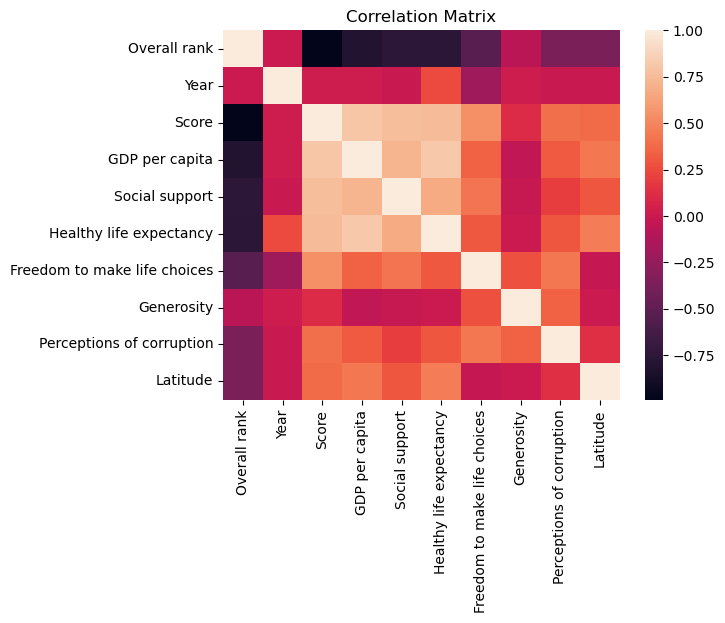

In [6]:
sns.heatmap(df.corr())  #sns.heatmap
plt.title("Correlation Matrix")  

In [7]:
print(df.describe())

       Overall rank         Year       Score  GDP per capita  Social support  \
count    312.000000   312.000000  312.000000      312.000000      312.000000   
mean      78.500000  2018.500000    5.391506        0.898298        1.211026   
std       45.104737     0.500803    1.114631        0.394592        0.300310   
min        1.000000  2018.000000    2.853000        0.000000        0.000000   
25%       39.750000  2018.000000    4.514250        0.609500        1.055750   
50%       78.500000  2018.500000    5.379500        0.960000        1.265500   
75%      117.250000  2019.000000    6.176000        1.219500        1.457500   
max      156.000000  2019.000000    7.769000        2.096000        1.644000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               312.000000                    312.000000  312.000000   
mean                  0.661295                      0.423538    0.182926   
std                   0.252724                     

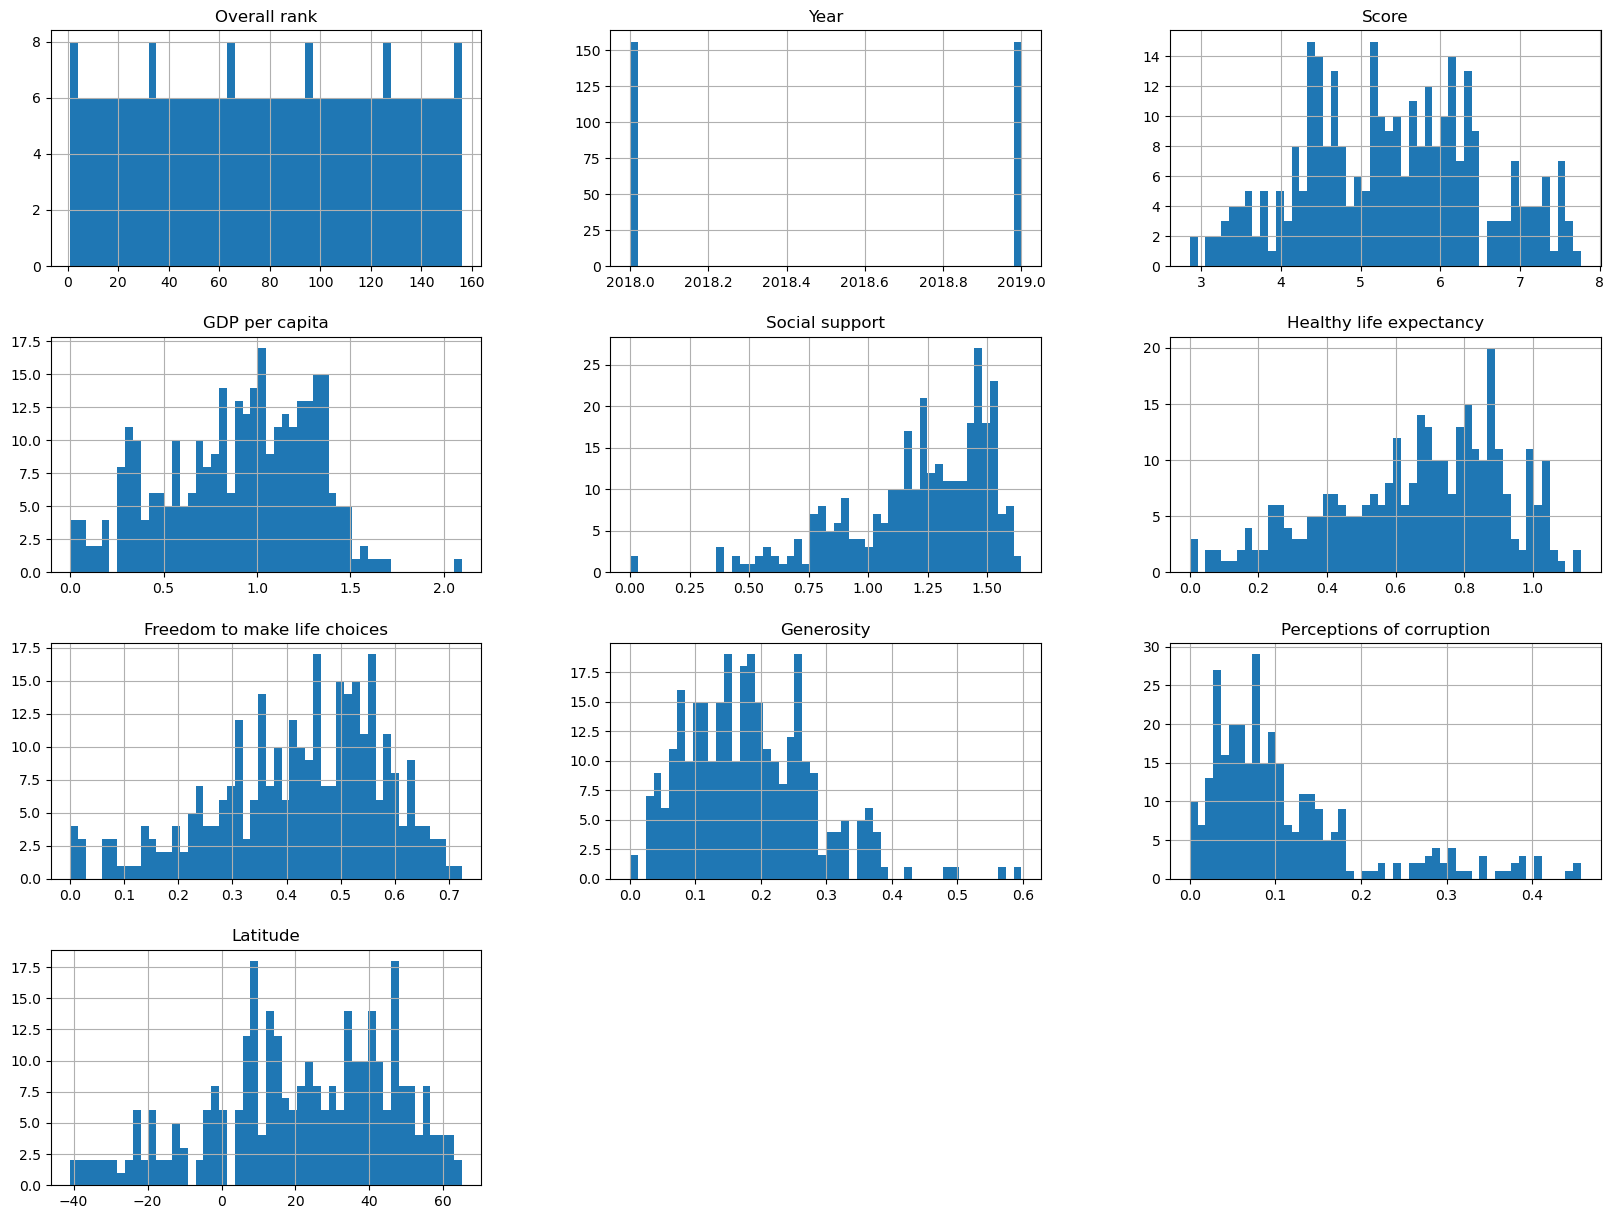

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

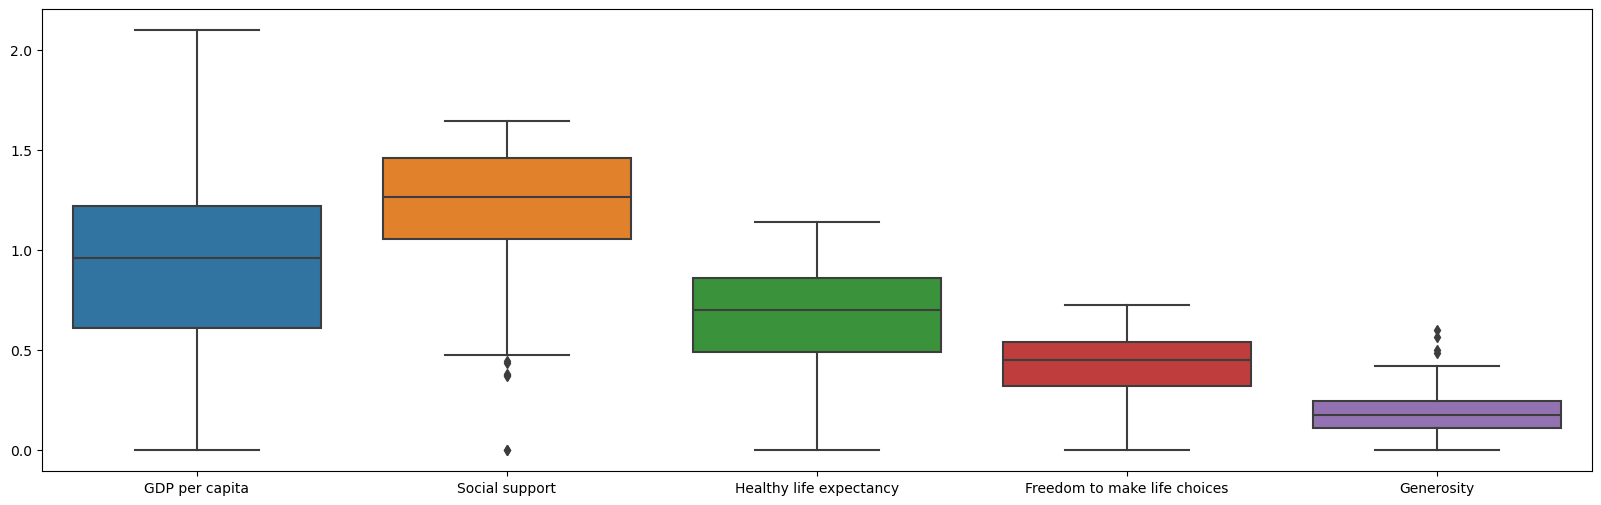

In [9]:
figure = plt.figure(figsize=(20,6))
sns.boxplot(data = df.drop(columns = ["Overall rank","Year","Latitude","Score","Perceptions of corruption"]))
plt.show()

<Axes: >

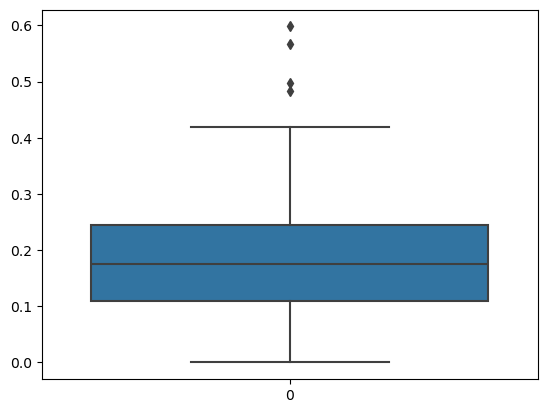

In [10]:
sns.boxplot(data=df["Generosity"])

In [11]:
q552, q952 = df["Generosity"].quantile([0.00, 0.95])
df_no = df[(df["Generosity"] >= q552) & (df["Generosity"] <= q952)]
df["Generosity"] = df_no["Generosity"]


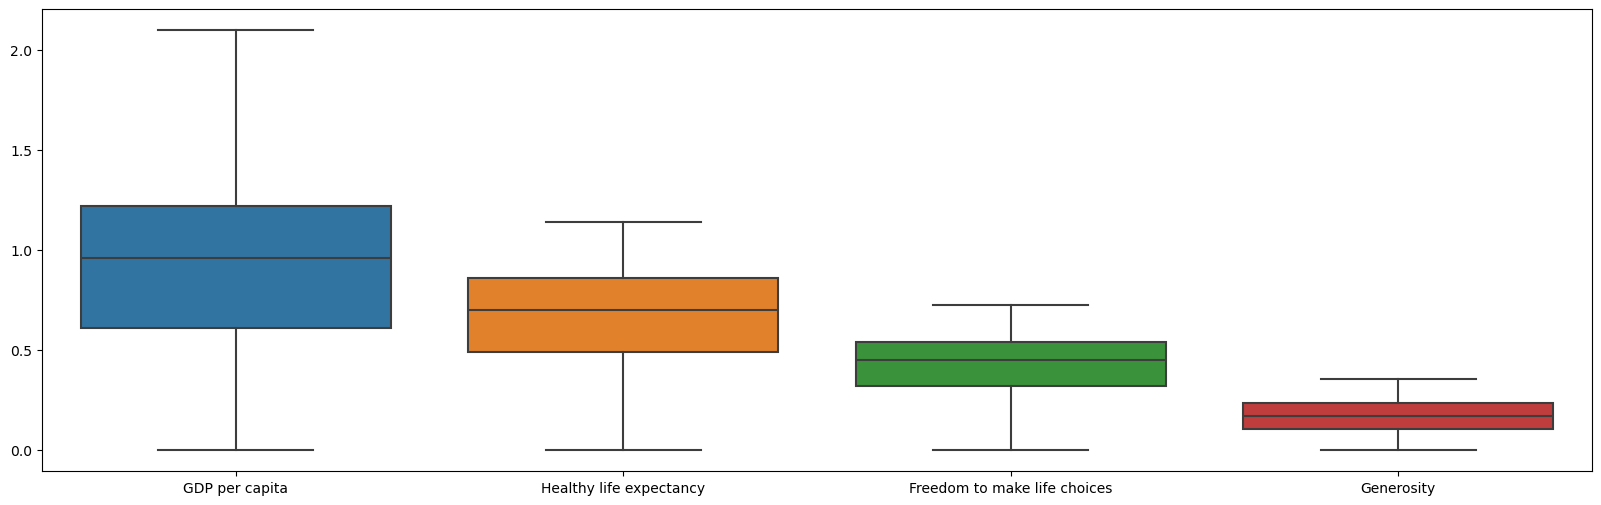

In [12]:
figure = plt.figure(figsize=(20,6))
sns.boxplot(data = df.drop(columns = ["Overall rank","Year","Latitude","Score","Perceptions of corruption","Social support"]))
plt.show()

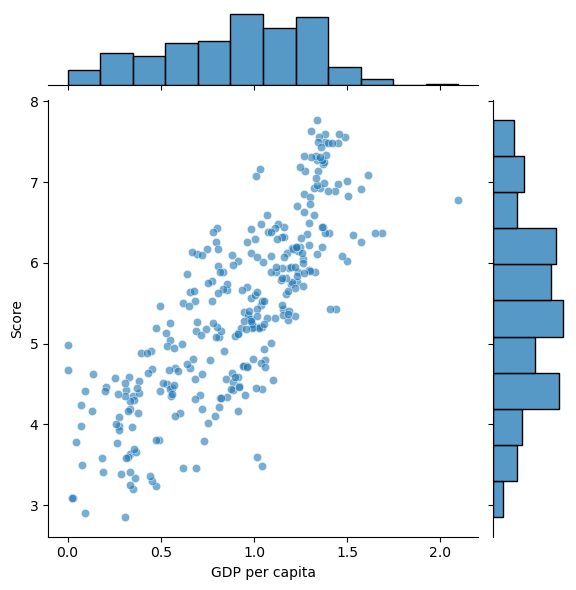

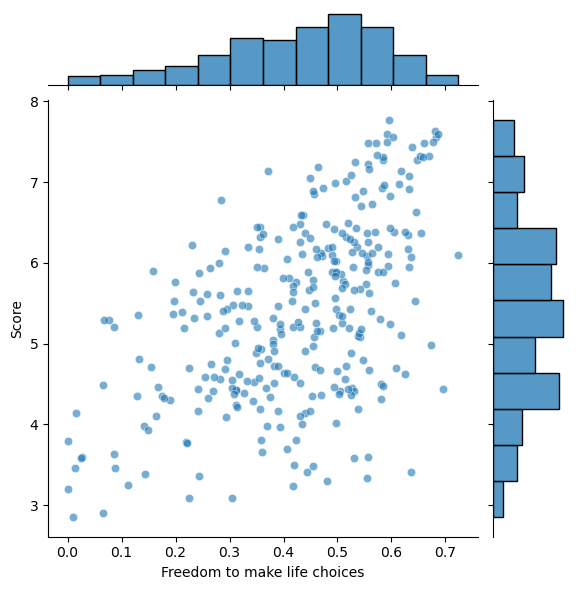

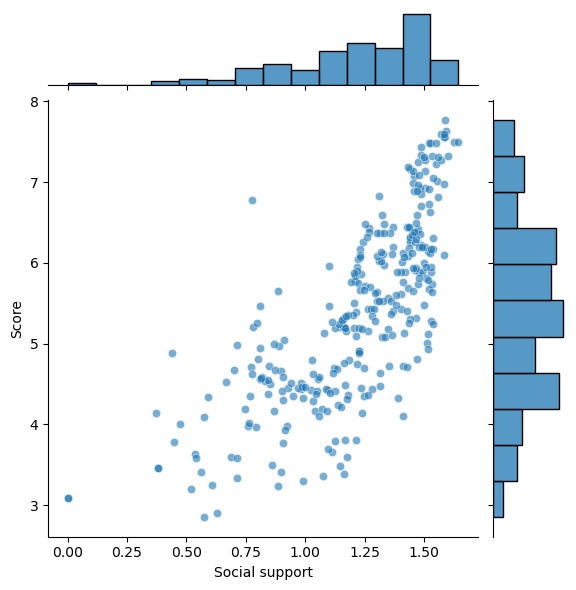

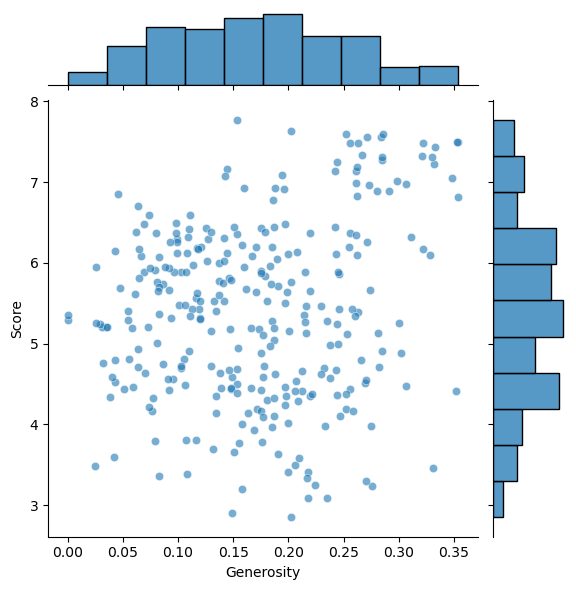

In [13]:
sns.jointplot(x="GDP per capita" , y = "Score" , data = df , alpha = 0.6)  
sns.jointplot(x="Freedom to make life choices" , y = "Score" , data = df , alpha = 0.6)
sns.jointplot(x="Social support" , y = "Score" , data = df , alpha = 0.6 )
sns.jointplot(x="Generosity" , y = "Score" , data = df , alpha = 0.6 )


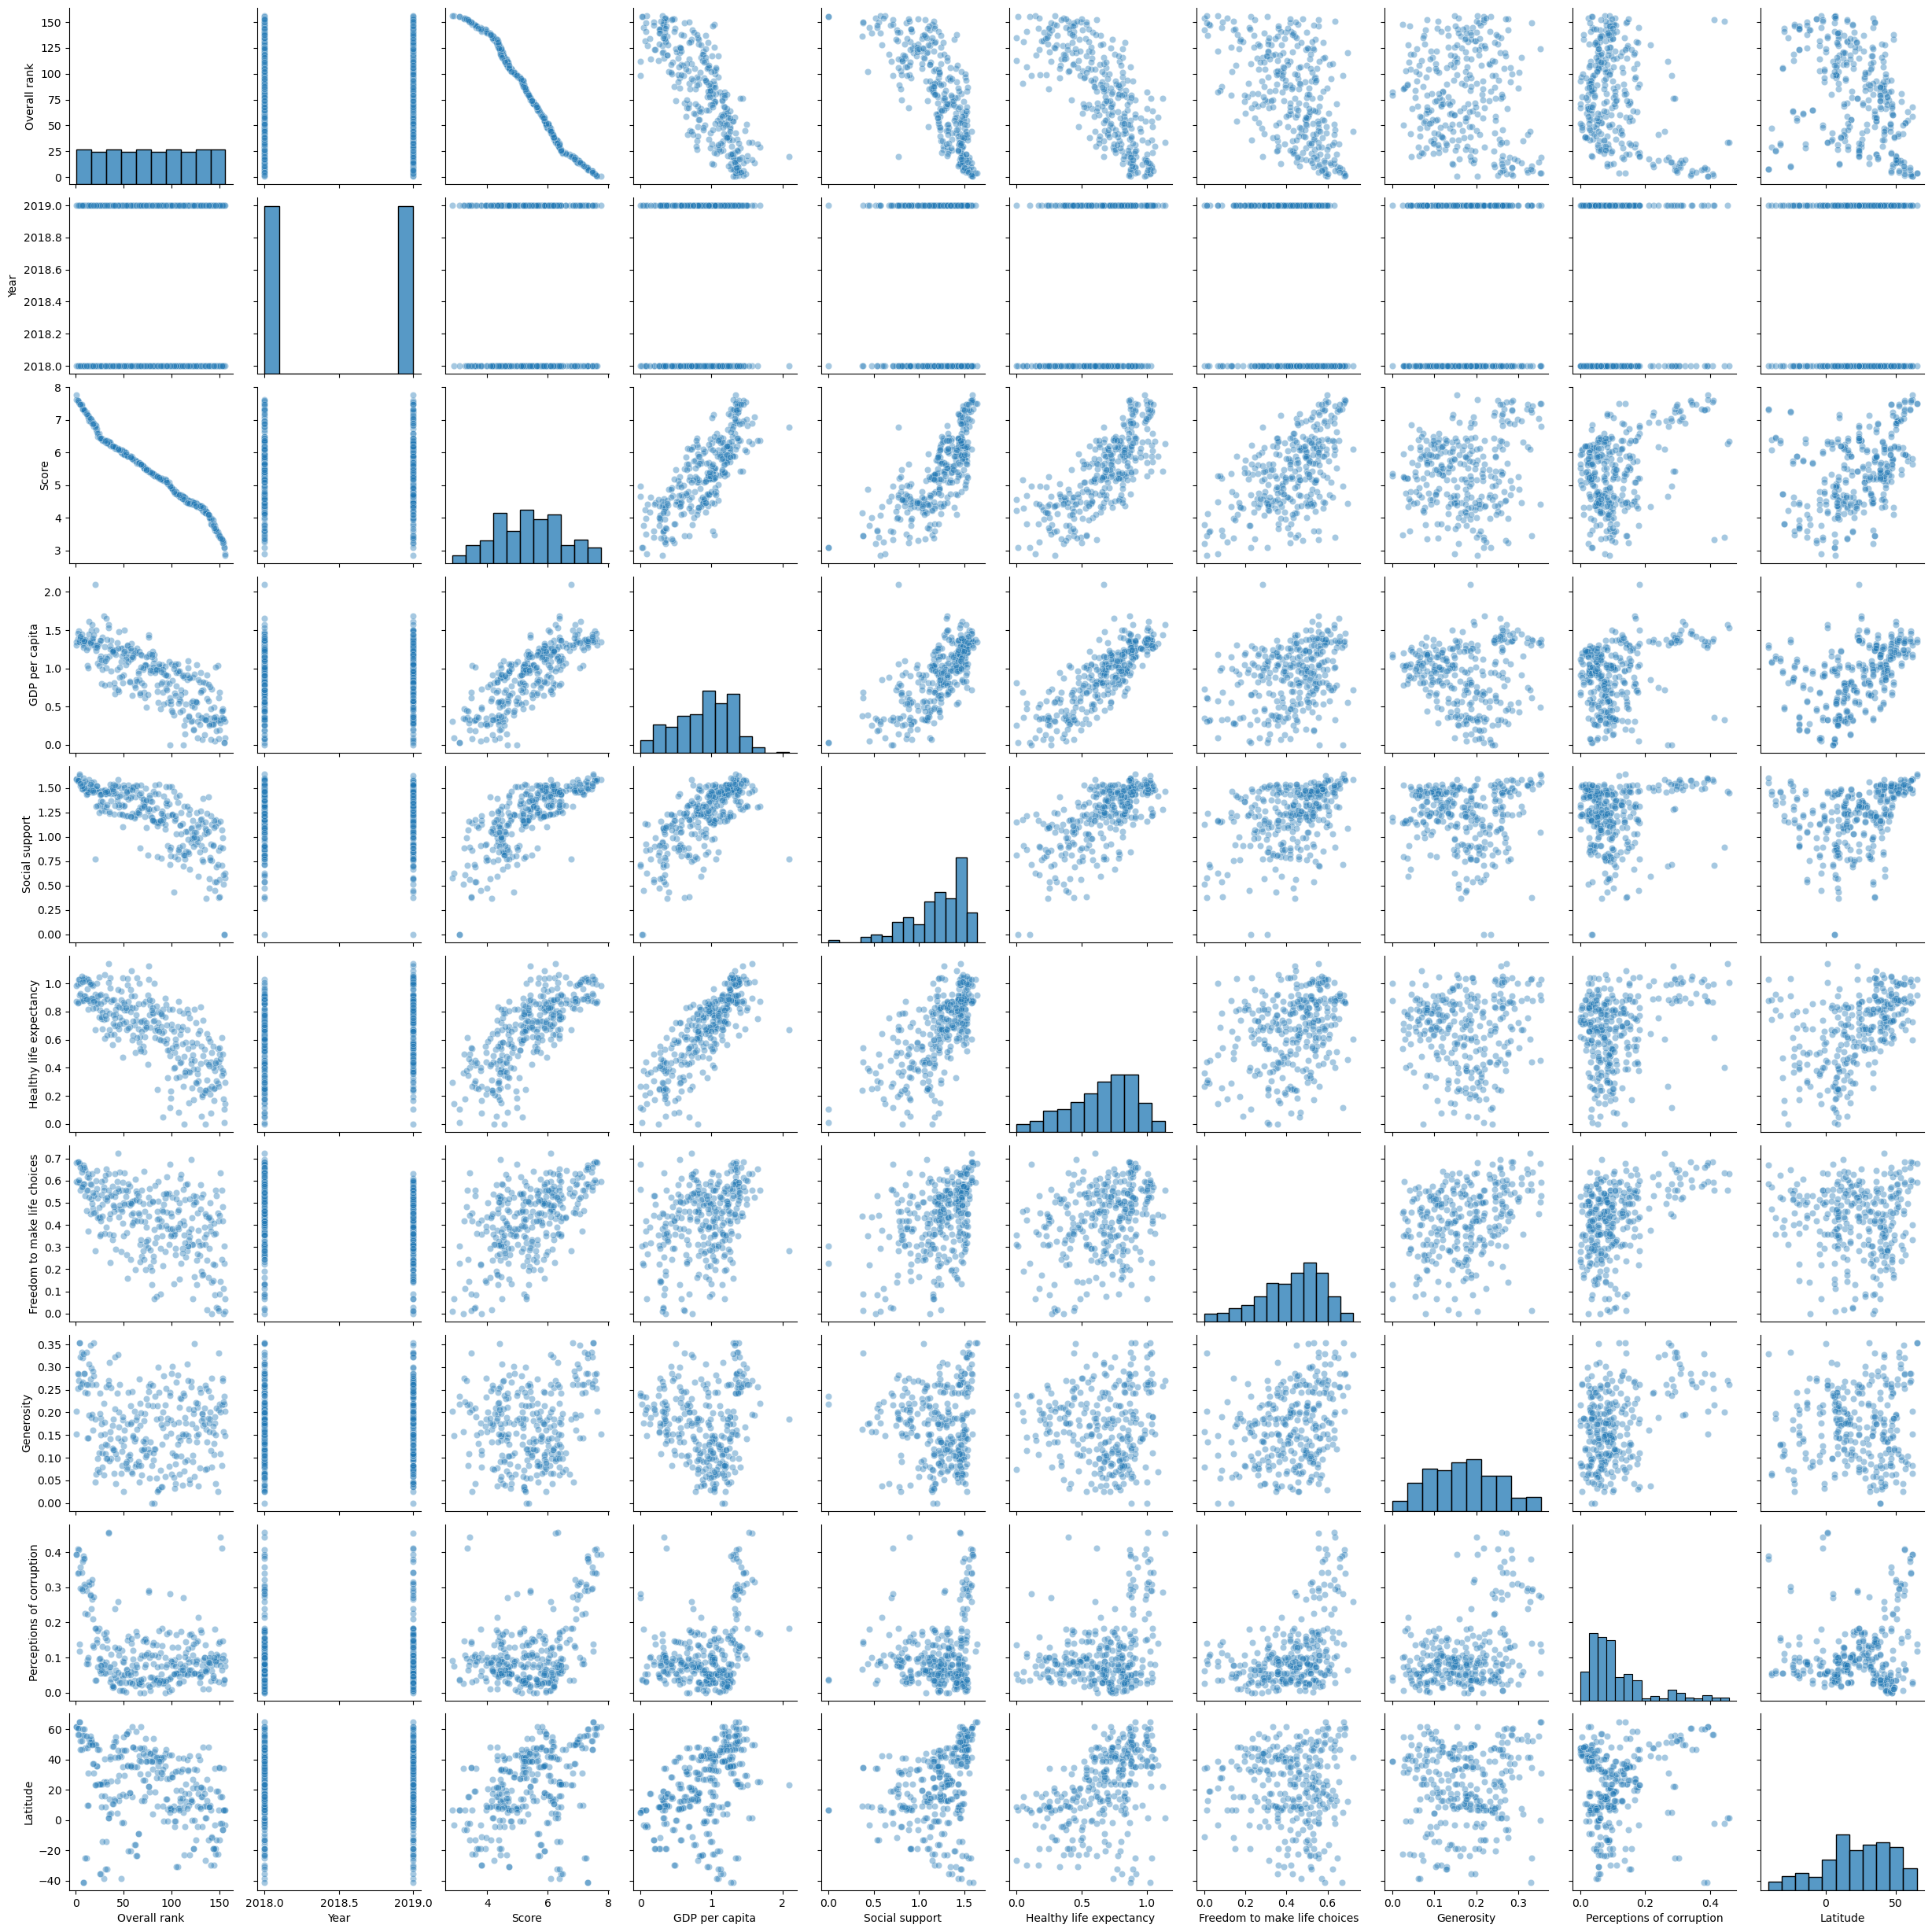

In [14]:
sns.pairplot(df,kind = "scatter" , plot_kws = {"alpha": 0.4})

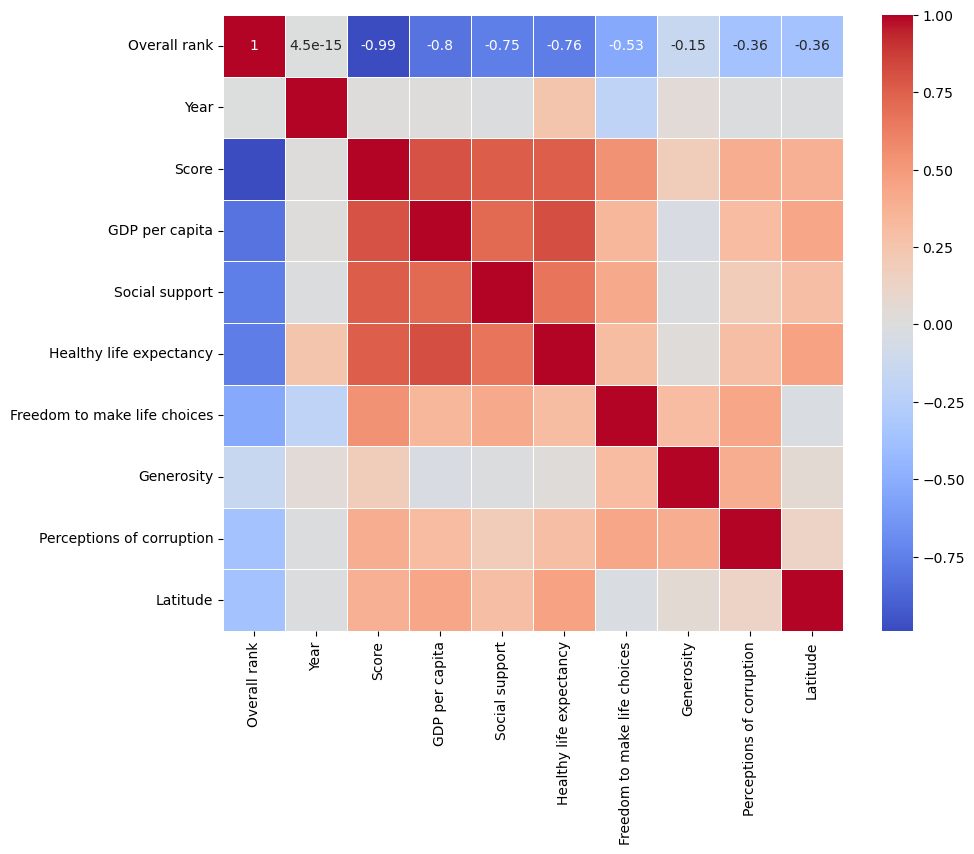

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()  # CORRELATION MATRIX

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

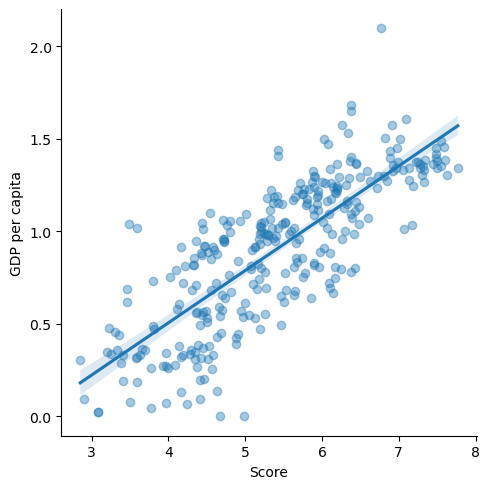

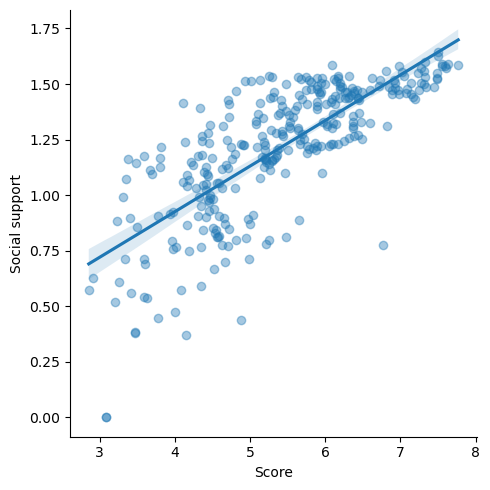

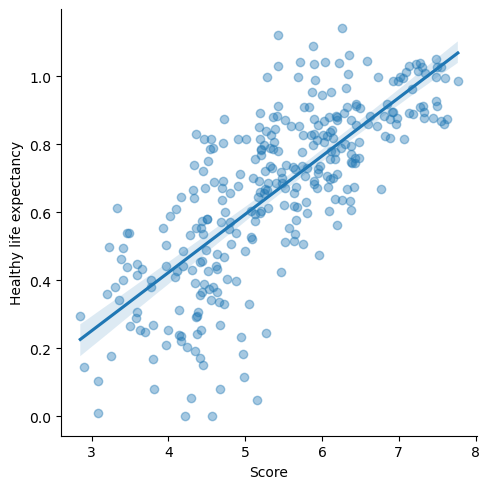

In [16]:
sns.lmplot ( x = "Score" , y = "GDP per capita" , data = df , scatter_kws={"alpha" : 0.4} )
sns.lmplot ( x = "Score" , y = "Social support" , data = df , scatter_kws={"alpha" : 0.4} )
sns.lmplot ( x = "Score" , y = "Healthy life expectancy" , data = df , scatter_kws={"alpha" : 0.4} )

# So based on the latest Shapes and the correlations we choose that the GDP per capita is the best representitive for our Happiniess score
# GDP per capita     0.797977 (correlation))



<h1>
 Now Let's train our model!
h1iv>


In [17]:
import pandas as pd


correlations = df.corr()
for column in df.columns:
    if column != "Score":
        score_correlation = correlations.loc["Score", column]
        print(f"{column}: ({score_correlation})")


Overall rank: (-0.9903250125882455)
Year: (0.014008934291403746)
GDP per capita: (0.7979774590297428)
Social support: (0.7610804996133)
Healthy life expectancy: (0.7558749404502871)
Freedom to make life choices: (0.5398973339024397)
Generosity: (0.17653978250434324)
Perceptions of corruption: (0.3969473314479115)
Latitude: (0.38384645070594403)


<h1 style = "color:Red">STARTING LINEAR SINGLE REGRESSION TEST</h1>

In [18]:
X = df["GDP per capita"]
y = df["Score"]

In [19]:
X = X.to_numpy().reshape(-1, 1)


In [20]:

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=24)  #TRAIN TEST SPLITS THE DATA TO TEST AND TRAIN 30% : 70%



print(len(X))
print(len(y))
print(len(test_X))
print(len(train_y))

312
312
94
218


# NOTICE! ↑↑↑↑ the length of the test and the train data 

In [44]:


model = LinearRegression()



expected change in the target variable for a one-unit increase in GDP per capita is  [2.13810418]
MEAN ABSOLUTE ERROR : 0.5751835540564437
MEAN Squared ERROR  : 0.47083989652471875
SQRT MSE :  0.686177744119349
R2 Score: 0.6684196643725747


model = LinearRegression()  #  initializes a new instance of the LinearRegression class
model.fit(train_X,train_y)  # Training the model 
print("expected change in the target variable for a one-unit increase in GDP per capita is " ,model.coef_) 
model.coef_() # بيطبع كل ال B الي طلعناهم من الموديل


train_test_split(X, y, test_size=0.3, random_state=24)  #TRAIN TEST SPLITS THE DATA TO TEST AND TRAIN 30% : 70%

model = LinearRegression()  #  initializes a new instance of the LinearRegression class
model.fit()  # Training the model 
model.predict() # Predict newer data as a result from the test data
residuals = test_y - predictions  # distance between predicted and the actual value 


MEAN ABSOLUTE ERROR : 0.42407884661038564 #  absolute(متوسط الفرق بين كل نقطة بريديكتد والنقطة الأصلية)
MEAN Squared ERROR  : 0.2650165349349704  #  Square(متوسط الفرق بين كل نقطة بريديكتد والنقطة الأصلية)
SQRT MSE :  0.5147975669474074   # Sqrt(MSE)
R-squared: 0.8152162411321384  # الموديل بتاعنا قدر يعبر عن قد ايه من الداتا

#there is no component for changing the number of features used in the regression model.
#The R-squared value will be the same or higher if we include more number of features in 
#the regression model.That's why we need to Use the Adjusted R squared(Better Version of R2 but More sensetive to the Features)
Adjusted R-squared: 0.8092070132014763 


F-statistic: 119.47309399602662
F-test p-value: 1.9270441556481997e-49 # احتمال انا الداتا بتاعتنا مينفعش تمثليها اصلا في لينيار ريجريشن

# Now let's move for the prediction part the array returned is the Y expected values for the give Test X values


In [22]:
predictions = model.predict(test_X)
print(predictions)  # Scores predicted

[6.15943812 6.42883924 5.15666726 6.07177585 3.49536031 5.55435464
 4.3612925  6.19364779 4.60076017 3.591575   4.58793155 4.09830569
 6.48015375 6.36255802 5.67408847 4.81670869 5.96914685 6.44808218
 6.10384741 4.88298992 5.65484553 4.7696704  6.31551972 5.92852287
 5.16949588 5.40254924 6.39462958 5.54366412 5.27212488 6.05039481
 4.67131761 6.05467101 5.46455426 4.23514436 6.44380597 5.14597674
 5.57359757 5.49662582 3.60654173 6.20861451 4.45323098 4.2565254
 4.64566036 6.00977083 6.64906398 5.78099368 5.73181728 4.05768171
 3.99140048 5.92210855 6.21075262 6.02259945 6.62554483 6.88425543
 6.21075262 6.31124352 5.90072751 6.54857308 4.38908786 4.8722994
 6.65761639 6.08032826 5.3298537  5.13956243 4.17955365 4.41688321
 5.66553605 5.70829814 5.9477658  3.73910419 5.39613493 6.5571255
 6.13378087 5.22081038 4.93216632 6.34117697 5.04976205 5.16735778
 5.97342306 4.7675323  5.49662582 5.97342306 6.38607716 5.50731634
 6.34331508 4.73759884 7.04461325 6.29413868 5.61849776 4.6221412

Text(0.5, 1.0, 'Evaluation of Predictions')

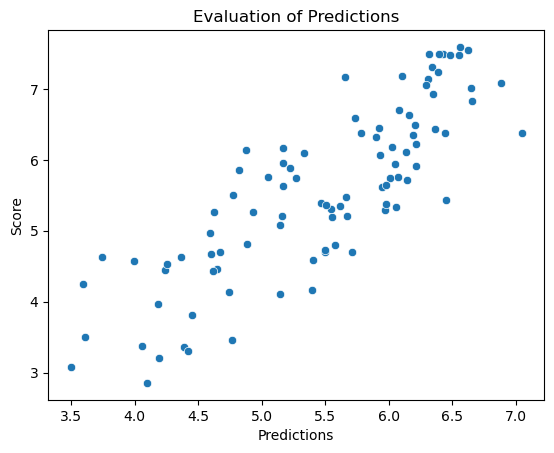

In [23]:
sns.scatterplot(x= predictions , y= test_y)
plt.xlabel("Predictions")
plt.title("Evaluation of Predictions")


In [24]:
print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(test_y , predictions)) # Absolute between predicted and the original one
print ("MEAN Squared ERROR  :" , mean_squared_error(test_y , predictions))  # SQUARED between predicted adn the original one
print ("SQRT MSE : " , math.sqrt(mean_squared_error(test_y , predictions))) #RMSE 
r2 = r2_score(test_y, predictions)
print("R2 Score:", r2)  # Measure Agreement between predicted values and real values

MEAN ABSOLUTE ERROR : 0.5751835540564437
MEAN Squared ERROR  : 0.47083989652471875
SQRT MSE :  0.686177744119349
R2 Score: 0.6684196643725747


# Testing Normality of the Model

174    0.467562
197    1.059161
187    0.051333
70    -0.309776
51    -0.412360
         ...   
146    0.638859
45    -0.184865
0     -0.989382
208   -0.426471
222    0.461504
Name: Score, Length: 94, dtype: float64


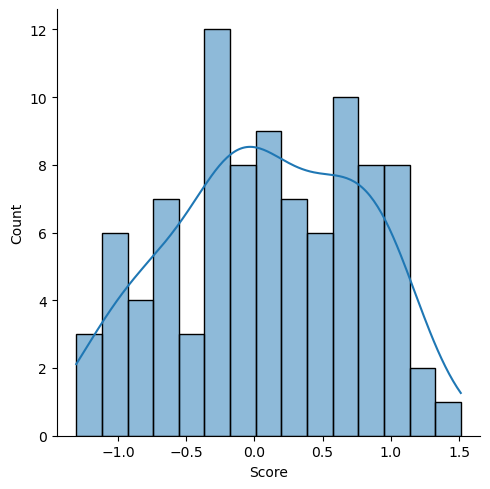

In [25]:
residuals = test_y - predictions 
print(residuals)  # distance between predicted and the actual value 
sns.displot(residuals , bins = 15 , kde = True)


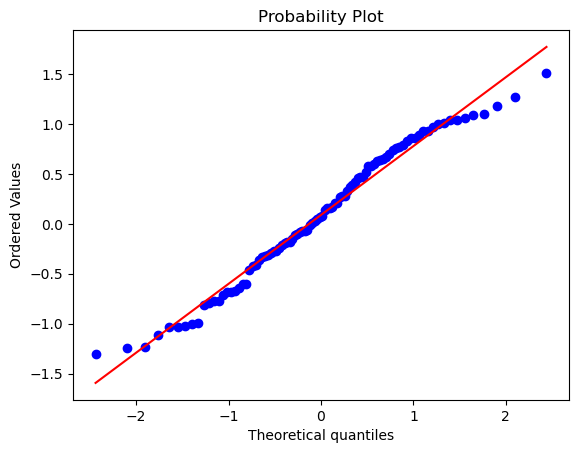

In [26]:
stats.probplot(residuals , dist = "norm" , plot = pylab)
pylab.show()

<h1 style="color:PaleGreen">As we saw on the visualization part that there is more than 1 feature that has a highly correlation with the Score of Happiniess in our data so Why don't we try a multiple regression !
</h1> 
<h3> GDP per capita                  0.797977
Social support                  0.761080
Healthy life expectancy         0.755875</h3>


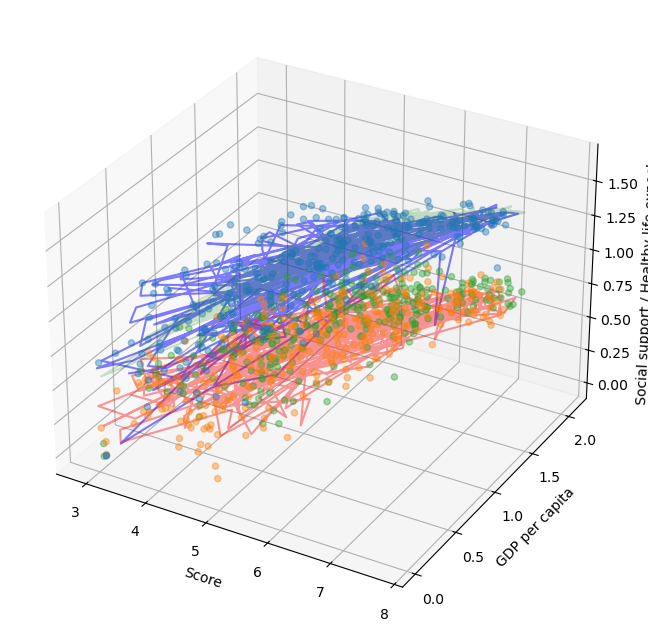

In [27]:

# Generate data points
y = df["Score"]
x1 = df["GDP per capita"]
x2 = df["Social support"]
x3 = df["Healthy life expectancy"]


coef1 = np.polyfit(y, x1, 2)
coef2 = np.polyfit(y, x2, 2)
coef3 = np.polyfit(y, x3, 2)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y, x1, x2, alpha=0.4)
ax.scatter(y, x1, x3, alpha=0.4)
ax.scatter(y, x2, x3, alpha=0.4)

ax.plot(y, np.polyval(coef1, y), x2, color='blue' , alpha = 0.5)
ax.plot(y, np.polyval(coef1, y), x3, color='red', alpha = 0.4)
ax.plot(y, x2, np.polyval(coef2, y), color='green',alpha = 0.2)

# Set labels and legend
ax.set_xlabel("Score")
ax.set_ylabel("GDP per capita")
ax.set_zlabel("Social support / Healthy life expectancy")


plt.show()


# Let's Increase the percentage of training data 80% instead of 70%


In [28]:
Features_Mat = df[["GDP per capita","Social support","Healthy life expectancy"]]
Scores_Mat = df["Score"]

In [29]:
Traindata_X , Testdata_X , Traindata_y , Testdata_y = train_test_split(Features_Mat ,Scores_Mat ,test_size = 0.2 , random_state = 24 )
modelMulti = LinearRegression()
modelMulti.fit(Traindata_X,Traindata_y)

LinearRegression()

In [30]:
print("R^2 = " , modelMulti.score(Testdata_X , Testdata_y))
y_predictionMulti = modelMulti.predict(Testdata_X)
print("B0 , B1 , B2",modelMulti.coef_)
print()

R^2 =  0.7421000889770365
B0 , B1 , B2 [0.92881596 1.33439262 1.05677316]



In [31]:
import statsmodels.api as sm
print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(Testdata_y , y_predictionMulti))
print ("MEAN Squared ERROR  :" , mean_squared_error(Testdata_y , y_predictionMulti))
print ("SQRT MSE : " , math.sqrt(mean_squared_error(Testdata_y , y_predictionMulti)))
r2Multi = r2_score(Testdata_y, y_predictionMulti)

print("R2 Score:", r2Multi)

X = sm.add_constant(Traindata_X)
model = sm.OLS(Traindata_y, X).fit()
print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)


MEAN ABSOLUTE ERROR : 0.5178175798505473
MEAN Squared ERROR  : 0.36662716386539396
SQRT MSE :  0.6054974515763002
R2 Score: 0.7421000889770365
F-statistic: 206.00187389779907
F-test p-value: 1.0894569060583187e-66


<h1 style = "color:Tomato"> there is no component for changing the number of features used in the regression model. The R-squared value will be the same or higher if we include more number of features in the regression model. </h1>

<h1 syle = "color: orange">That's why we need to Use the Adjusted R squared(Better Version of R2 but More sensetive to the Features)</h1>

In [32]:
def adjusted_r_squared(r_squared, n, p):
    return 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Assuming you have values for R-squared, number of observations (n), and number of predictors (p)
n = len(Testdata_y)
p = 3  # Assuming you have one predictor # عدد الفيتشرز الي بتيست عليهم
r_squared = r2Multi  # Your R-squared value 

r_adj = adjusted_r_squared(r_squared, n, p)
print("Adjusted R-squared:", r_adj)


Adjusted R-squared: 0.7289865341792587


# Adjusted R-squared: 0.7289865341792587

<h1> Way better than the Single Linear But Couldn't We get a better result ? </h1>

174    0.262408
197    0.888851
187    0.378267
70    -0.145243
51     0.834281
         ...   
307   -1.065673
202    0.804886
292    0.593238
72     0.460515
142    0.619919
Name: Score, Length: 63, dtype: float64


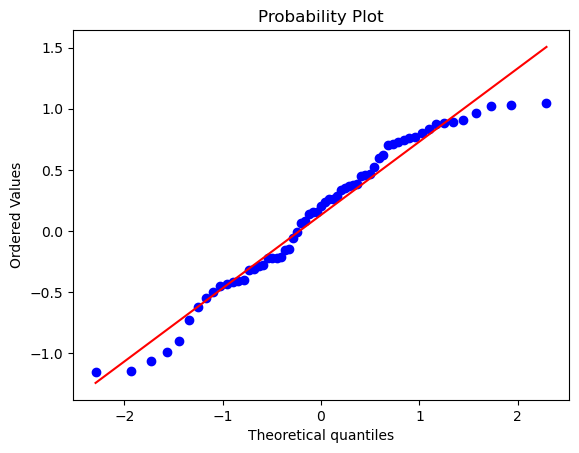

In [33]:
residuals = Testdata_y - y_predictionMulti 
print(residuals)  # distance between predicted and the actual value 
stats.probplot(residuals , dist = "norm" , plot = pylab)
pylab.show()

<h1 style = "color : Red">What if we Removed one of our Features and Rereview the R^2 Adjusted ?  </h1>

Coefficients: [1.35936396 1.49959396]
Mean Absolute Error: 0.5109669770020088
Mean Squared Error: 0.3787524215876831
Root Mean Squared Error: 0.6154286486569204
R-squared Score: 0.7335707076438602
Adjusted R-squared: 0.7246897312319889
Residuals: 174    0.291541
197    0.985760
187    0.624281
70    -0.016860
51     0.728190
         ...   
307   -1.177089
202    0.932795
292    0.495222
72     0.479823
142    0.731356
Name: Score, Length: 63, dtype: float64
F-statistic: 282.76220297029033
F-test p-value: 1.741498752817804e-64


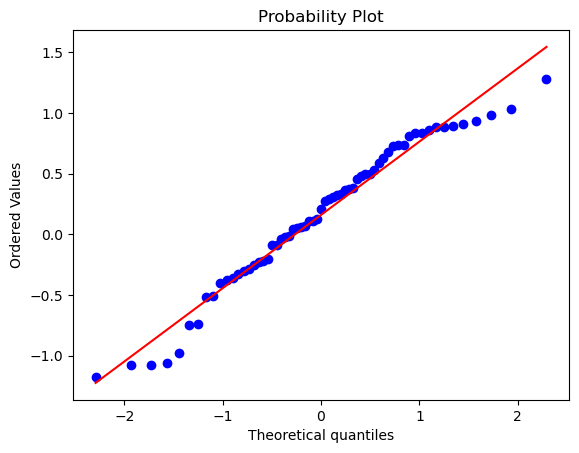

In [34]:

Features_MatFor2 = df[["GDP per capita","Social support"]]
Scores_MatFor2 = df["Score"]


TraindataMulti2_X, TestdataMulti2_X, TraindataMulti2_y, TestdataMulti2_y = train_test_split(
    Features_MatFor2, Scores_MatFor2, test_size=0.2, random_state=24)

# Creating and fitting the linear regression model
Model_Multi2 = LinearRegression()
Model_Multi2.fit(TraindataMulti2_X, TraindataMulti2_y)

# Evaluating the model
PredictMult2 = Model_Multi2.predict(TestdataMulti2_X)

# Coefficients of the model
print("Coefficients:", Model_Multi2.coef_)

# Mean Absolute Error
print("Mean Absolute Error:", mean_absolute_error(TestdataMulti2_y, PredictMult2))

# Mean Squared Error
print("Mean Squared Error:", mean_squared_error(TestdataMulti2_y, PredictMult2))

# Root Mean Squared Error
print("Root Mean Squared Error:", math.sqrt(mean_squared_error(TestdataMulti2_y, PredictMult2)))

# R-squared Score
r2Multi2 = r2_score(TestdataMulti2_y, PredictMult2)
print("R-squared Score:", r2Multi2)

# Adjusted R-squared Score
def adjusted_r_squared(r_squared, n, p):
    return 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

n = len(TestdataMulti2_y)
p = 2  # Assuming you have two predictors
r_adj = adjusted_r_squared(r2Multi2, n, p)
print("Adjusted R-squared:", r_adj)

# Residuals
residualsFor2 = TestdataMulti2_y - PredictMult2
print("Residuals:", residualsFor2)

X = sm.add_constant(TraindataMulti2_X)
model = sm.OLS(TraindataMulti2_y, X).fit()
print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)

# Q-Q Plot
stats.probplot(residualsFor2, dist="norm", plot=pylab)
pylab.show()



<h1 style = "color:red">Notice that after we removed the Feature "Healthy life expectancy" the R^2 Adjusted Got lessen From 0.7421000889770365 To 0.7246897312319889 Then It's better to stick to the 3 Features and don't remove any of them   </h1>

# F test: It is used to determine whether the independent variables contribute overall to explaining the variance in the dependent variable# 
Adjusted R-squared: Used to evaluate the prediction quality of the model. It is preferable to choose the model that achieves the highest value of the.ر.

# adjusted correlation coefficient, as this indicates that the model explains a greater proportion of the variance in the dependent variable compared to # the other model.

# Can't we get the accuracy Over than 0.742 ? That's a question we have to Ask what we can do to improve our 3 Features model to predict better ?


## if our model is being overfitting while the training Set this could be a problem in our model that It won't work well if it meets any Generalized points while testing so we will give away some of the perfection in the training to make our model more Generalized (Reduce the slope (alpha * slope^2) alpha increase well make the model less sensetive and more generalized ) And that is what is called RIDGE REGRESSION

In [35]:
Features_Mat = df[["GDP per capita","Social support","Healthy life expectancy"]]
Scores_Mat = df["Score"]

TraindataRidge_X , TestdataRidge_X , TraindataRidge_y , TestdataRidge_y = train_test_split(Features_Mat ,Scores_Mat ,test_size = 0.410 , random_state = 24 )


scaler = StandardScaler()
TraindataRidge_X_scaled = scaler.fit_transform(TraindataRidge_X)
TestdataRidge_X_scaled = scaler.transform(TestdataRidge_X)

# Creating and training the Ridge regression model
ridge_reg = Ridge(alpha=0.001)  # You can adjust the regularization strength by changing the alpha parameter  # بيقلل الميل ويخلي الموديل جينرال اكتر
ridge_reg.fit(TraindataRidge_X_scaled, TraindataRidge_y)

# Making predictions
y_predRidge = ridge_reg.predict(TestdataRidge_X_scaled)


r_squaredRidge = ridge_reg.score(TestdataRidge_X_scaled, TestdataRidge_y)

n = len(TestdataRidge_y)
p = 3  
r_adjRidge = adjusted_r_squared(r_squaredRidge, n, p)

X = sm.add_constant(TraindataRidge_X)
model = sm.OLS(TraindataRidge_y, X).fit()



print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(TestdataRidge_y , y_predRidge))
print ("MEAN Squared ERROR  :" , mean_squared_error(TestdataRidge_y , y_predRidge))
print ("SQRT MSE : " , math.sqrt(mean_squared_error(TestdataRidge_y , y_predRidge)))
print("R-squared:", r_squaredRidge)

print("Adjusted R-squared:", r_adjRidge)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)


MEAN ABSOLUTE ERROR : 0.4910491935500278
MEAN Squared ERROR  : 0.3470281117316168
SQRT MSE :  0.5890909197497588
R-squared: 0.758033365977261
Adjusted R-squared: 0.7521793345089689
F-statistic: 130.6096005626023
F-test p-value: 5.901597597004354e-45


<h1 style = "color : Green "># Adjusted R-squared Increased From 0.728 to 0.751 !</h1>

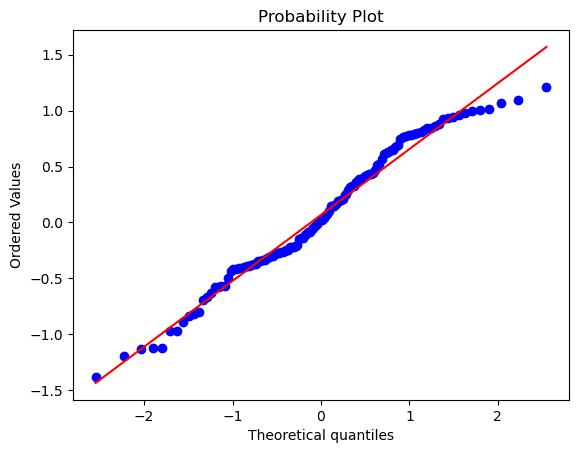

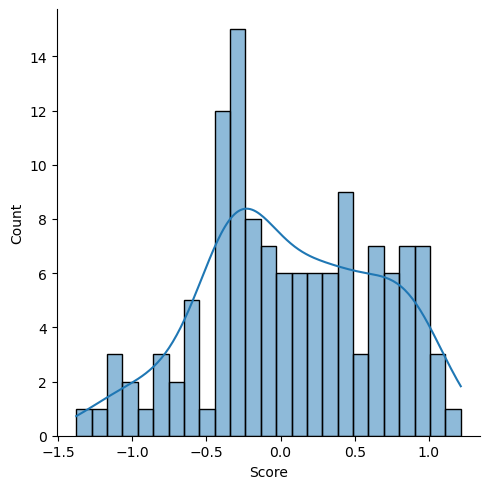

In [36]:
residualsRidge = TestdataRidge_y - y_predRidge

stats.probplot(residualsRidge , dist = "norm" , plot = pylab)
pylab.show()
sns.displot(residualsRidge , bins = 25 , kde = True)

<h1 style = "color : orange"> By adding the 4th Feature + Ridge Regression We Reached the highest R-squared and Adjusted R-squared with <span style = "color : red">Adjusted R-squared: 0.809652289968997</span>
  And Features  ["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices"]
</h1>

In [37]:

Features_MatRidge2 = df[["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices"]]
Scores_MatRidge2 = df["Score"]


TraindataRidge2_X , TestdataRidge2_X , TraindataRidge2_y , TestdataRidge2_y = train_test_split(Features_MatRidge2 ,Scores_MatRidge2 ,test_size = 0.410 , random_state = 24 )

# Standardizing the features
scaler = StandardScaler()
TraindataRidge2_X_scaled = scaler.fit_transform(TraindataRidge2_X)
TestdataRidge2_X_scaled = scaler.transform(TestdataRidge2_X)

# Creating and training the Ridge regression model
ridge2_reg = Ridge(alpha=2)  # You can adjust the regularization strength by changing the alpha parameter
#  adjusting the value of alpha, you can control the trade-off between
# fitting the data well (i.e., minimizing the MSE) and keeping the coefficients small (i.e., avoiding overfitting)
ridge2_reg.fit(TraindataRidge2_X_scaled, TraindataRidge2_y)

y_predRidge2 = ridge2_reg.predict(TestdataRidge2_X_scaled)


r_squaredRidge2 = ridge2_reg.score(TestdataRidge2_X_scaled, TestdataRidge2_y)

n = len(TestdataRidge2_y)
p = 4  
r_adjRidge2 = adjusted_r_squared(r_squaredRidge2, n, p)

X = sm.add_constant(TraindataRidge2_X)
model = sm.OLS(TraindataRidge2_y, X).fit()


print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(TestdataRidge2_y , y_predRidge2))
print ("MEAN Squared ERROR  :" , mean_squared_error(TestdataRidge2_y , y_predRidge2))
print ("SQRT MSE : " , math.sqrt(mean_squared_error(TestdataRidge2_y , y_predRidge2)))
print("R-squared:", r_squaredRidge2)

print("Adjusted R-squared:", r_adjRidge2)

print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)



MEAN ABSOLUTE ERROR : 0.42407884661038564
MEAN Squared ERROR  : 0.2650165349349704
SQRT MSE :  0.5147975669474074
R-squared: 0.8152162411321384
Adjusted R-squared: 0.8092070132014763
F-statistic: 119.47309399602662
F-test p-value: 1.9270441556481997e-49


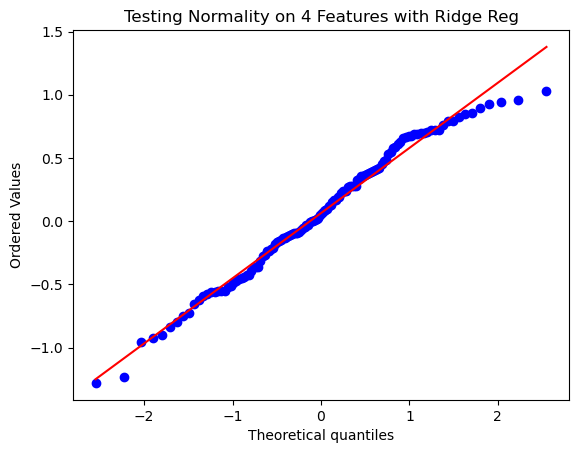

In [38]:
residualsRidge2 = TestdataRidge2_y - y_predRidge2
stats.probplot(residualsRidge2 , dist = "norm" , plot = pylab)
plt.title("Testing Normality on 4 Features with Ridge Reg")
pylab.show()



<h1 style = "color : orange"> Instead of putting a random alpha what if we get the best alpha
</h1>

In [39]:
alphas = np.logspace(-3, 3, 100)  # Adjust the range as needed
print(alphas)
best_mse = float('inf')  # Initialize best MSE
best_alpha = None  # Initialize best alpha

for alpha in alphas:
    # Create and train Ridge regression model
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(TraindataRidge2_X_scaled, TraindataRidge2_y)

    # Make predictions on the test set
    y_pred = ridge_reg.predict(TestdataRidge2_X_scaled)

    # Calculate MSE
    mse = mean_squared_error(TestdataRidge2_y, y_pred)

    # Check if this alpha gives a lower MSE
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

# Train the Ridge regression model with the best alpha
best_ridge_reg = Ridge(alpha=best_alpha)
best_ridge_reg.fit(TraindataRidge2_X_scaled, TraindataRidge2_y)

# Evaluate on test set
y_pred = best_ridge_reg.predict(TestdataRidge2_X_scaled)
mse = mean_squared_error(TestdataRidge2_y, y_pred)
print("Best alpha:", best_alpha)
print("Mean Squared Error on Test Set:", mse)


[1.00000000e-03 1.14975700e-03 1.32194115e-03 1.51991108e-03
 1.74752840e-03 2.00923300e-03 2.31012970e-03 2.65608778e-03
 3.05385551e-03 3.51119173e-03 4.03701726e-03 4.64158883e-03
 5.33669923e-03 6.13590727e-03 7.05480231e-03 8.11130831e-03
 9.32603347e-03 1.07226722e-02 1.23284674e-02 1.41747416e-02
 1.62975083e-02 1.87381742e-02 2.15443469e-02 2.47707636e-02
 2.84803587e-02 3.27454916e-02 3.76493581e-02 4.32876128e-02
 4.97702356e-02 5.72236766e-02 6.57933225e-02 7.56463328e-02
 8.69749003e-02 1.00000000e-01 1.14975700e-01 1.32194115e-01
 1.51991108e-01 1.74752840e-01 2.00923300e-01 2.31012970e-01
 2.65608778e-01 3.05385551e-01 3.51119173e-01 4.03701726e-01
 4.64158883e-01 5.33669923e-01 6.13590727e-01 7.05480231e-01
 8.11130831e-01 9.32603347e-01 1.07226722e+00 1.23284674e+00
 1.41747416e+00 1.62975083e+00 1.87381742e+00 2.15443469e+00
 2.47707636e+00 2.84803587e+00 3.27454916e+00 3.76493581e+00
 4.32876128e+00 4.97702356e+00 5.72236766e+00 6.57933225e+00
 7.56463328e+00 8.697490

In [40]:

Features_MatRidge2 = df[["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices"]]
Scores_MatRidge2 = df["Score"]



TraindataRidge2_X , TestdataRidge2_X , TraindataRidge2_y , TestdataRidge2_y = train_test_split(Features_MatRidge2 ,Scores_MatRidge2 ,test_size = 0.410 , random_state = 24 )

# Standardizing the features
scaler = StandardScaler()
TraindataRidge2_X_scaled = scaler.fit_transform(TraindataRidge2_X)
TestdataRidge2_X_scaled = scaler.transform(TestdataRidge2_X)

# Creating and training the Ridge regression model
ridge2_reg = Ridge(alpha=0.001)  # You can adjust the regularization strength by changing the alpha parameter
ridge2_reg.fit(TraindataRidge2_X_scaled, TraindataRidge2_y)

# Making predictions
y_predRidge2 = ridge2_reg.predict(TestdataRidge2_X_scaled)


r_squaredRidge2 = ridge2_reg.score(TestdataRidge2_X_scaled, TestdataRidge2_y)

n = len(TestdataRidge2_y)
p = 4  
r_adjRidge2 = adjusted_r_squared(r_squaredRidge2, n, p)
X = sm.add_constant(TraindataRidge2_X)
model = sm.OLS(TraindataRidge2_y, X).fit()




print ("MEAN ABSOLUTE ERROR :" , mean_absolute_error(TestdataRidge2_y , y_predRidge2))
print ("MEAN Squared ERROR  :" , mean_squared_error(TestdataRidge2_y , y_predRidge2))
print ("SQRT MSE : " , math.sqrt(mean_squared_error(TestdataRidge2_y , y_predRidge2)))
print("R-squared:", r_squaredRidge2)

print("Adjusted R-squared:", r_adjRidge2)
print("F-statistic:", model.fvalue)
print("F-test p-value:", model.f_pvalue)


MEAN ABSOLUTE ERROR : 0.4229079391732775
MEAN Squared ERROR  : 0.26378517301097987
SQRT MSE :  0.5136002073704603
R-squared: 0.8160748127865356
Adjusted R-squared: 0.8100935058852847
F-statistic: 119.47309399602662
F-test p-value: 1.9270441556481997e-49


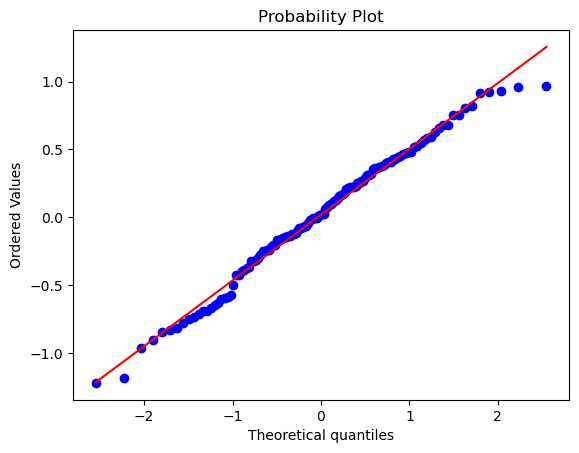

R-squared (Polynomial Regression): 0.8394073282004619
Adjusted R-squared (Polynomial Regression): 0.8178993810844524
Mean Absolute Error (Polynomial Regression): 0.38812167291688493
Mean Squared Error (Polynomial Regression): 0.23032172132994033
Root Mean Squared Error (Polynomial Regression): 0.4799184527916595


In [41]:


# Define polynomial degree
degree = 2  # You can adjust the degree as needed

# Create polynomial features transformer
poly_transformer = PolynomialFeatures(degree=degree)

# Transform features
TraindataRidge2_X_poly = poly_transformer.fit_transform(TraindataRidge2_X)
TestdataRidge2_X_poly = poly_transformer.transform(TestdataRidge2_X)

# Standardize the polynomial features
scaler = StandardScaler()
TraindataRidge2_X_poly_scaled = scaler.fit_transform(TraindataRidge2_X_poly)
TestdataRidge2_X_poly_scaled = scaler.transform(TestdataRidge2_X_poly)

# Create and train the Ridge regression model with polynomial features
ridge_poly_reg = Ridge(alpha=0.001)  # You can adjust the regularization strength by changing the alpha parameter
ridge_poly_reg.fit(TraindataRidge2_X_poly_scaled, TraindataRidge2_y)

# Making predictions
y_predRidge_poly = ridge_poly_reg.predict(TestdataRidge2_X_poly_scaled)

# Calculate R-squared and adjusted R-squared for polynomial regression
r_squared_poly = ridge_poly_reg.score(TestdataRidge2_X_poly_scaled, TestdataRidge2_y)
n_poly = len(TestdataRidge2_y)
p_poly = TraindataRidge2_X_poly.shape[1]  
r_adj_poly = adjusted_r_squared(r_squared_poly, n_poly, p_poly)



residualsPoly = TestdataRidge2_y - y_predRidge_poly

stats.probplot(residualsPoly , dist = "norm" , plot = pylab)
pylab.show()



print("R-squared (Polynomial Regression):", r_squared_poly)
print("Adjusted R-squared (Polynomial Regression):", r_adj_poly)
print("Mean Absolute Error (Polynomial Regression):", mean_absolute_error(TestdataRidge2_y, y_predRidge_poly))
print("Mean Squared Error (Polynomial Regression):", mean_squared_error(TestdataRidge2_y, y_predRidge_poly))
print("Root Mean Squared Error (Polynomial Regression):", np.sqrt(mean_squared_error(TestdataRidge2_y, y_predRidge_poly)))


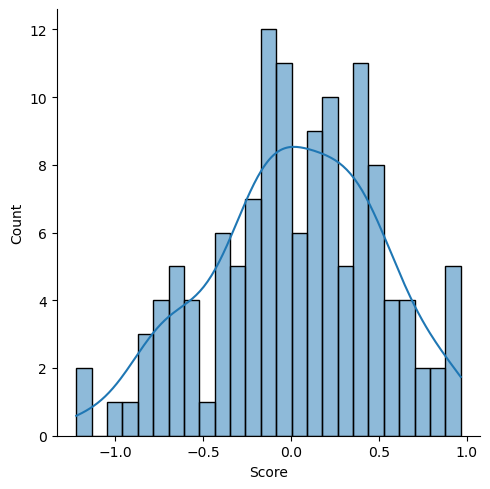

In [42]:
sns.displot(residualsPoly , bins = 25 , kde = True)


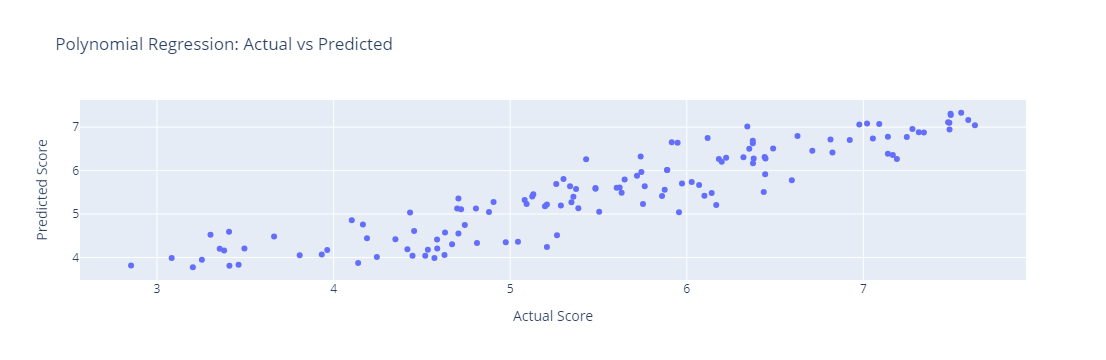

In [43]:

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual': TestdataRidge2_y, 'Predicted': y_predRidge_poly})

# Plot using Plotly Express
fig = px.scatter(plot_data, x='Actual', y='Predicted', 
                 title='Polynomial Regression: Actual vs Predicted', 
                 labels={'Actual': 'Actual Score', 'Predicted': 'Predicted Score'})
fig.show()


<h1 style = "color : orange"> Starting From the simple with R2 Score: 0.6684196643725747
Then Normal Multiple Adjusted R-squared: 0.7289865341792587
Then Ridge Multiple Adjusted R-squared: 0.8100935058852847
At the End Polynomial Ridge Adjusted R-squared: 0.8178993810844524
</h1>
<h1 style = "font_size = 20">Thank You<h1>